# Information Security - Lab 3

In [1]:
DEBUG = True

In [2]:
import json

import numpy as np
from tqdm import tqdm

import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [3]:
M = np.random.randint(100, 1000)
K = np.random.randint(10, 100)

u = np.random.randint(0,2, size=M)
k = np.random.randint(0,2, size=K)

if (DEBUG): 
    print(M)
    print(K)
    print(u)
    print(k)

412
37
[1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0]
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0]


## 📝 TASK 1

In [ ]:
def computeTag(u, k):
    dec_u = sum(int(digit) for digit in str(int("".join(map(str, u)), 2)))
    dec_k = sum(int(digit) for digit in str(int("".join(map(str, k)), 2)))

    if DEBUG:
        print("Computed k sum: ",dec_k)

    dec_tag = dec_u*dec_k
    tag = np.array([int(digit) for digit in bin(dec_tag)[2:]])
    return tag

In [5]:
def verification (u, k, t):
    return np.array_equal(computeTag(u, k), t)


if(DEBUG):
    t = computeTag(u,k)
    print(t)
    #u = np.random.randint(0,2, size=M)
    print(verification(u,k,t))


[1 1 0 0 1 0 1 0 0 0 0 0 0 0 1]
True


## 📝 TASK 2

In [6]:
def computeAttackTag(u, dec_k):
    dec_u = sum(int(digit) for digit in str(int("".join(map(str, u)), 2)))
    dec_tag = dec_u*dec_k
    tagAttack = np.array([int(digit) for digit in bin(dec_tag)[2:]])
    return tagAttack 

In [7]:
def sub_attack(u,t):
    dec_u = sum(int(digit) for digit in str(int("".join(map(str, u)), 2)))
    dec_tag = int("".join(map(str, t)), 2)
    dec_key = dec_tag//dec_u

    if DEBUG:
        print("Attacker computed k sum: ", dec_key)

    u1 = np.random.randint(0,2, size=M)
    tag1 = computeAttackTag(u1, dec_key)
    return u1, tag1

if (DEBUG):
    success = 0
    for i in tqdm(range(10000)):
        u = np.random.randint(0,2, size=M)
        k = np.random.randint(0,2, size=K)
        ogTag = computeTag(u, k)
        u1, tag1 = sub_attack(u, ogTag)
        if(verification(u1, k, tag1)):
            success += 1
    prob = success/10000
    print("PROB:", prob)

100%|██████████| 10000/10000 [00:10<00:00, 988.31it/s]

PROB: 1.0


## 📝 TASK 3

**NOTE**: do **not** use the below code, you will die before it ends it's execution with values of $K > 16$. Please get yourself a **Rust** compiler and use the code inside the *speed* folder 👍

In [ ]:
import math

#K = 10

def kSumProbability():
    dict = {}

    for k in range(int(math.pow(2, K))):
        
        if DEBUG and k % 10000 == 0:
            print('Iteration k = ', k)
        
        s = sum(int(digit) for digit in str(k))

        if dict.get(s) == None:
            dict[s] = 1
        else:
            dict[s] += 1

    #print(dict)
    print(max(dict, key=dict.get))

kSumProbability()


In [ ]:
# Evaluate the accept probability empirically

### 📊 Plotting results of the digit sums 

In [10]:
import matplotlib.pyplot as plt

def plotHist(data):
    # Prepare data
    counts = data["digit_sum_counts"]
    x = list(range(len(counts)))
    y = counts

    # Find the index of the highest value
    max_index = y.index(max(y))

    # Set bar colors: default to one color, highlight max with another
    colors = ['skyblue'] * len(y)
    colors[max_index] = 'orange'  # Highlight the max bar

    # Plotting
    plt.figure(figsize=(14, 6))
    plt.bar(x, y, color=colors)
    plt.xlabel('Digit Sum')
    plt.ylabel('Count')
    plt.title('Digit Sum Counts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    perc = y[max_index] * 100 / data["samples"]

    # Annotate the highest bar
    plt.text(
        max_index, y[max_index],
        f'{max_index:,}: {perc:.2f}%',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='orange'
    )

    plt.tight_layout()
    plt.show()


#### Results for K = 8

All possible keys evaluated $|k| = 2^8 = 256$

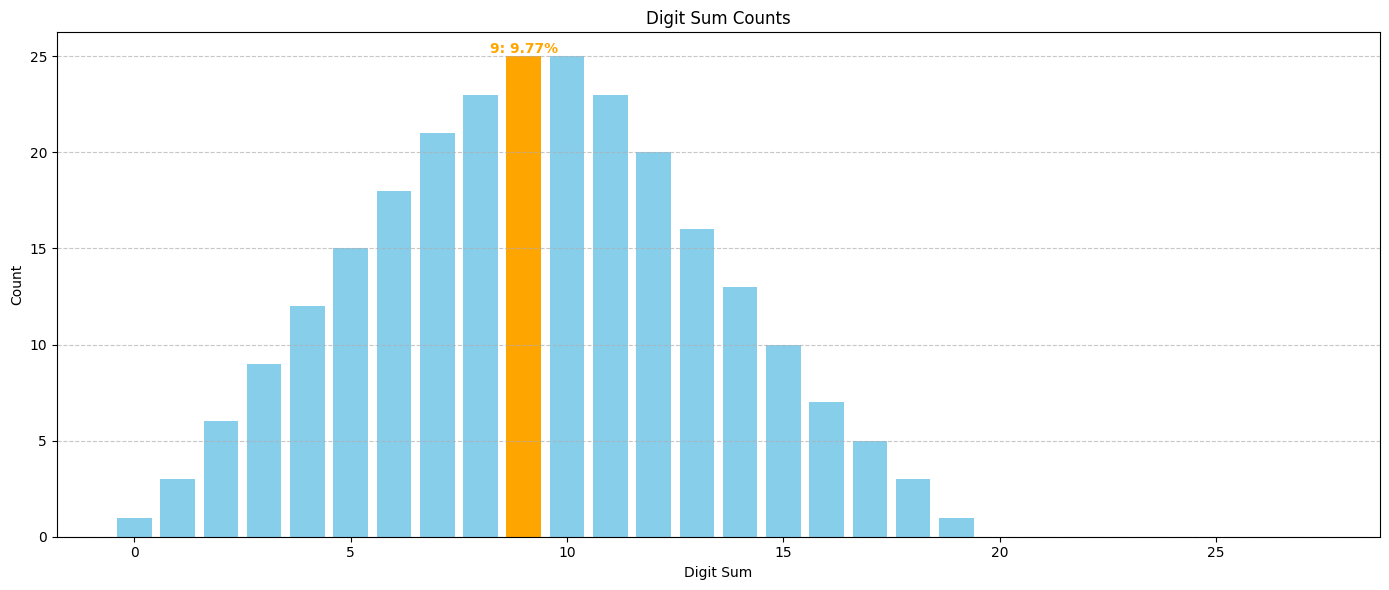

In [11]:
with open('digit_sum_counts_8.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

#### Results for K = 18

All possible keys evaluated $|k| = 2^{18} \approx 2.6 \cdot 10^5$

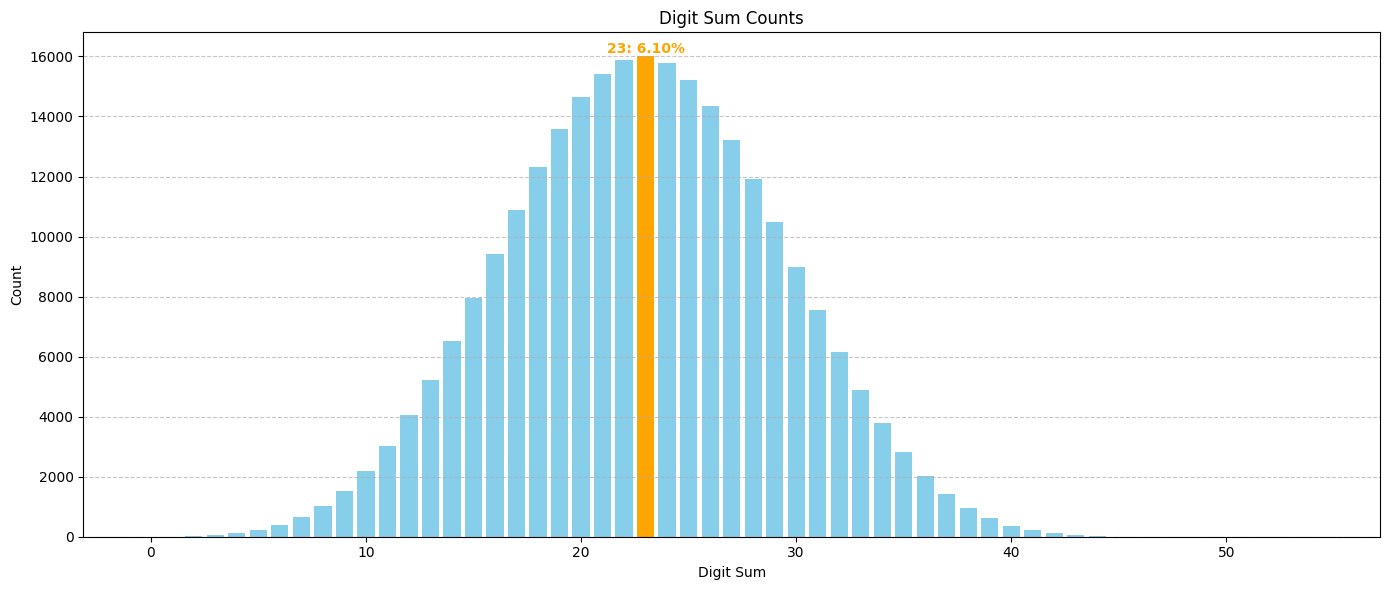

In [12]:
with open('digit_sum_counts_18.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

#### Results for K = 36

All possible keys evaluated $|k| = 2^{36} \approx 6.8 \cdot 10^{10}$

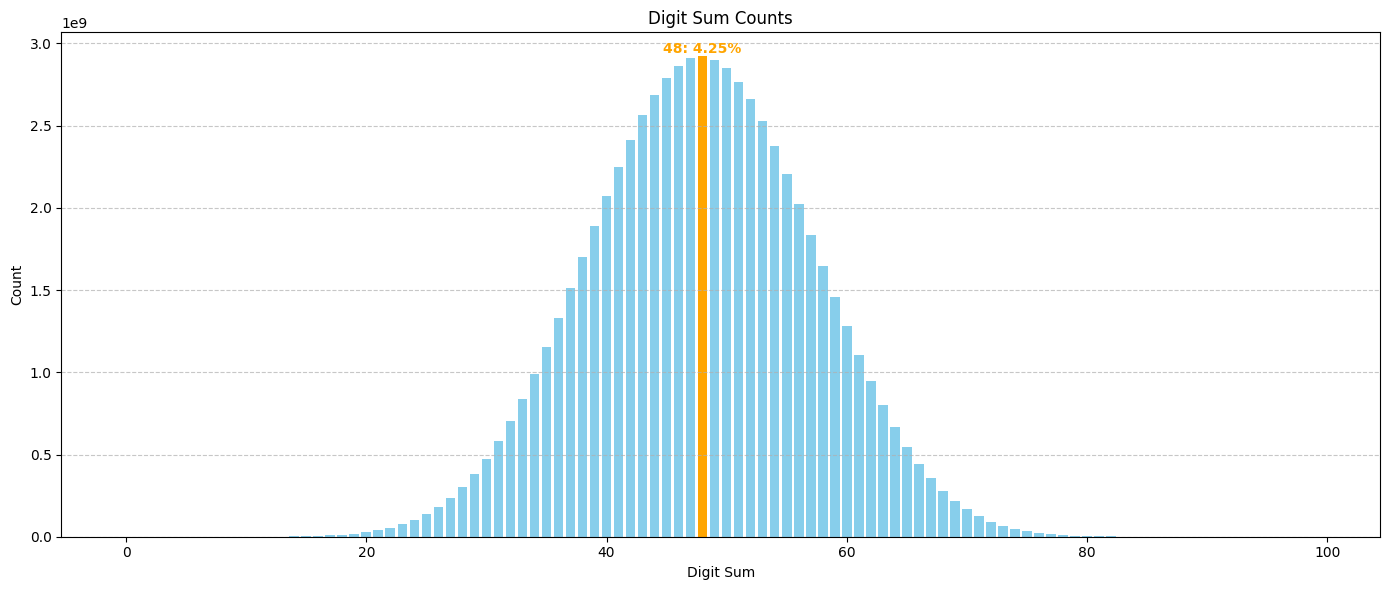

In [13]:
with open('digit_sum_counts_36.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

#### Results for K = 64

Evaluated a sample of $10^{11}$ possible keys. Keys were selected randomly in the interval $[0, 2^{64}-1]$.

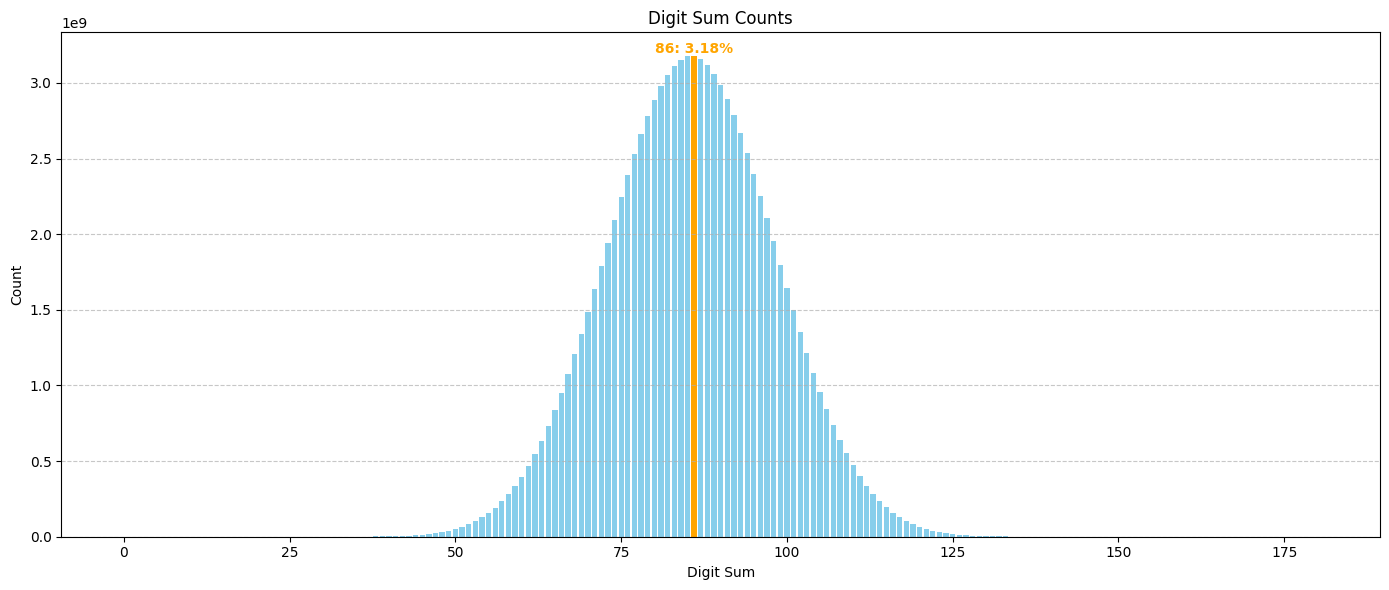

In [14]:
with open('digit_sum_sample_64.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

#### Results for K = 100

Evaluated a sample of $10^{11}$ possible keys. Keys were selected randomly in the interval $[0, 2^{100}-1]$.

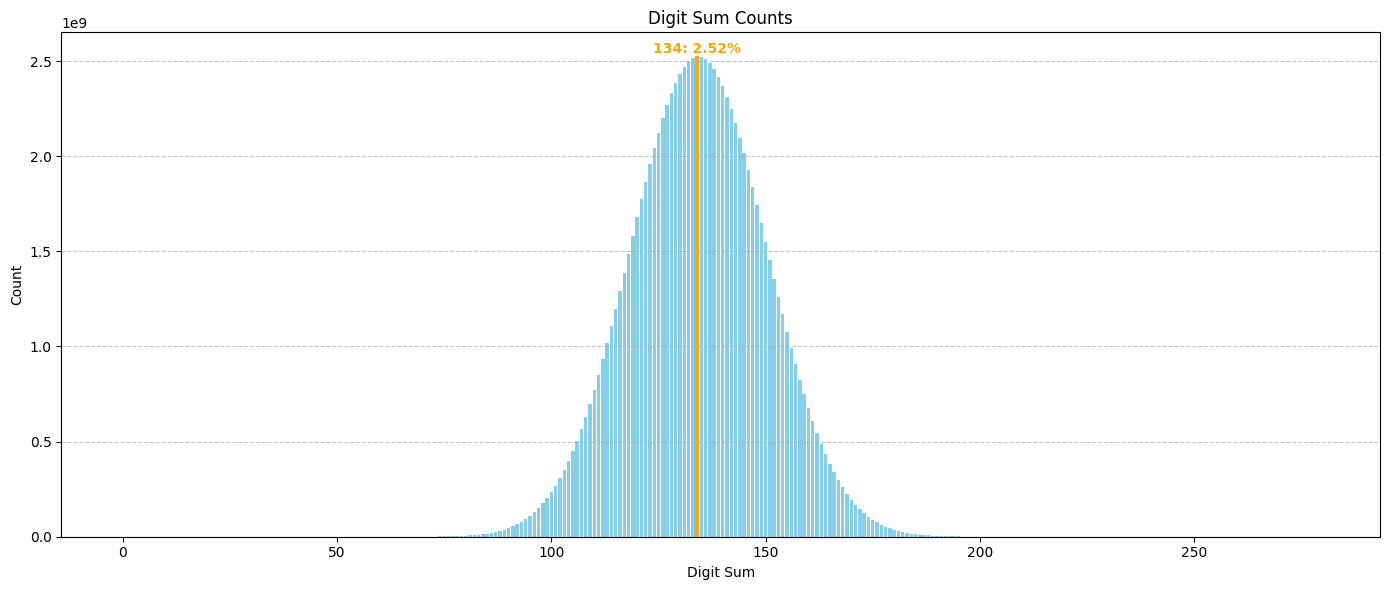

In [15]:
with open('digit_sum_sample_100.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

---

# 📄 Plotting data for the report

## 🕑 Average computation time vs. M and K for the authentication/verification scheme

In [ ]:
def auth_and_verify(M_size, K_size):
    # Generate random binary strings
    u = np.random.randint(0,2, size=M_size)
    k = np.random.randint(0,2, size=K_size)

    start = time.perf_counter()

    t = computeTag(u, k)
    assert verification(u, k, t)
    
    end = time.perf_counter()

    return (end - start) * 1000  # time in milliseconds

# Ranges
M_values = list(range(100, 1001, 10))
K_values = list(range(10, 101, 1))

avg_times = np.zeros((len(K_values), len(M_values)))

# Measure average time
samples = 100
for i, k in enumerate(K_values):
    for j, m in enumerate(M_values):
        times = [auth_and_verify(m, k) for _ in range(samples)]
        avg_times[i, j] = np.mean(times)



Applying a smoothing function helps to highlight trends in the collected data by deleting outliers

In [ ]:
from scipy.ndimage import gaussian_filter

smoothed_times = gaussian_filter(avg_times, sigma=2)

---

### 📊 Heat Map

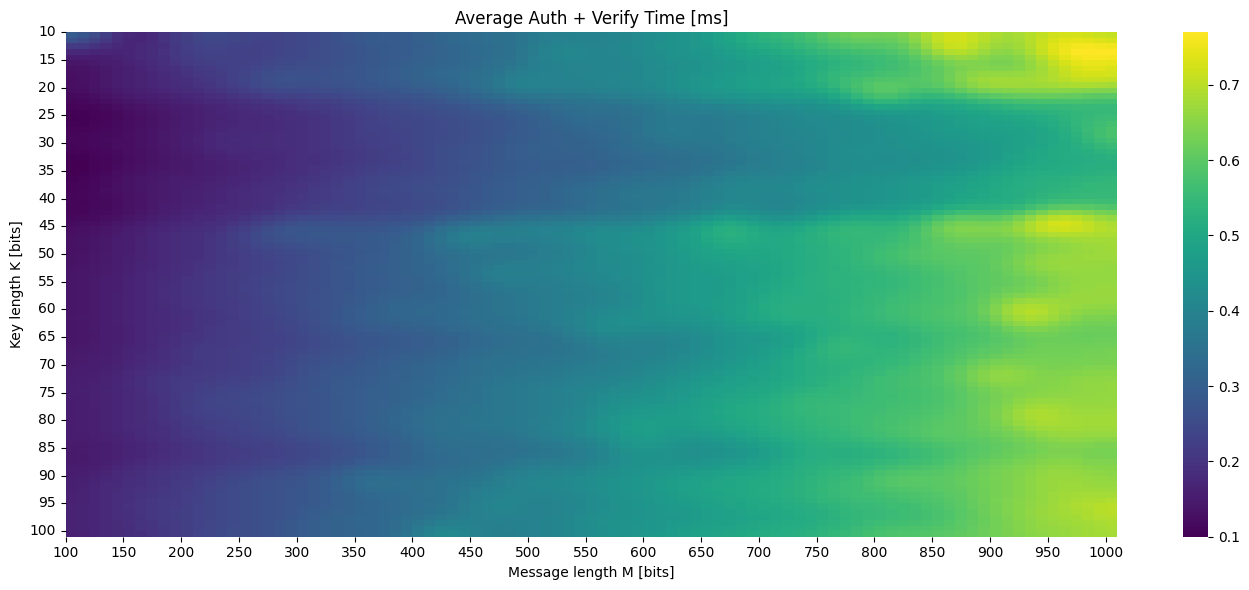

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.heatmap(smoothed_times, cmap=cm.viridis, annot=False, fmt=".2f")

# Determine tick positions and corresponding labels
x_ticks = np.arange(0, len(M_values), 5)
y_ticks = np.arange(0, len(K_values), 5)

x_labels = [str(M_values[i]) for i in x_ticks]
y_labels = [str(K_values[i]) for i in y_ticks]

# Set them on the heatmap
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

plt.xlabel("Message length M [bits]")
plt.ylabel("Key length K [bits]")
plt.title("Average Auth + Verify Time [ms]")
plt.tight_layout()
plt.show()


---

### 🌄 3D Surface Plot

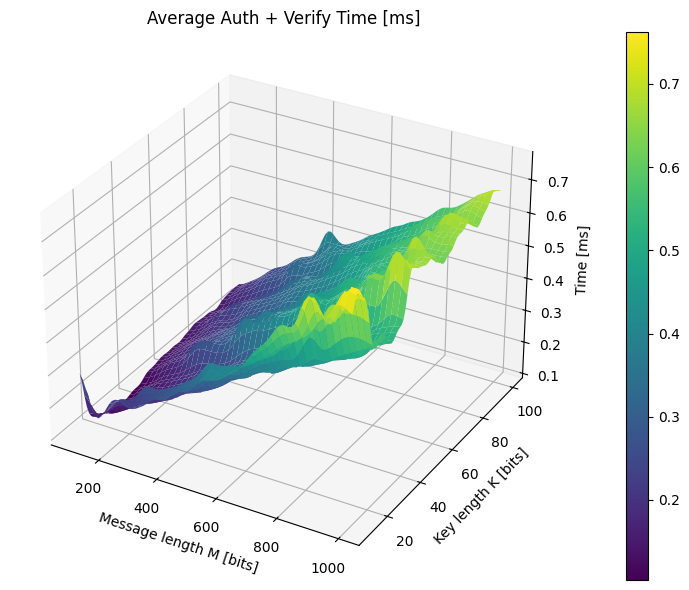

In [ ]:
M_grid, K_grid = np.meshgrid(M_values, K_values)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(M_grid, K_grid, smoothed_times, cmap=cm.viridis, edgecolor='none')
ax.set_xlabel('Message length M [bits]')
ax.set_ylabel('Key length K [bits]')
ax.set_zlabel('Time [ms]')
ax.set_title('Average Auth + Verify Time [ms]')
fig.colorbar(surf, ax=ax, aspect=25)
plt.tight_layout()
plt.show()


That looks like a **plane** to me ✈️

---

## 🕑 Average computation time vs. M and K for the forgin attack and successful substitution

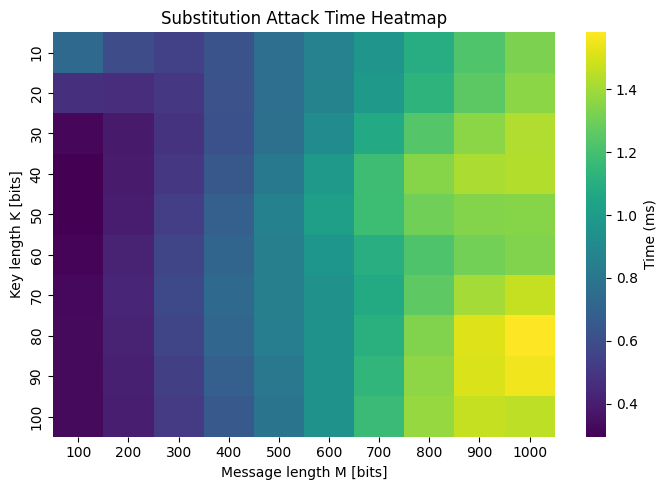

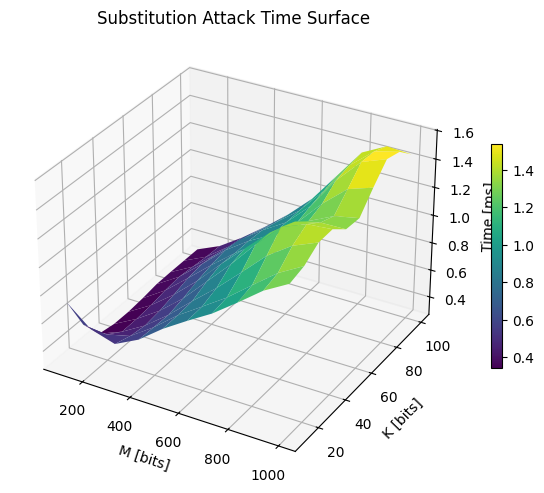

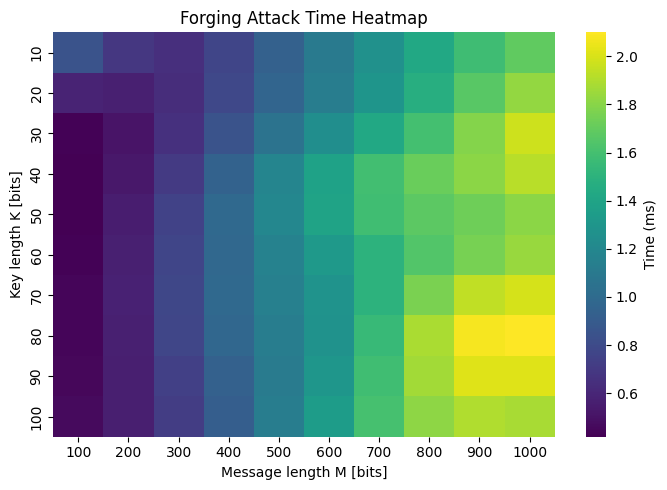

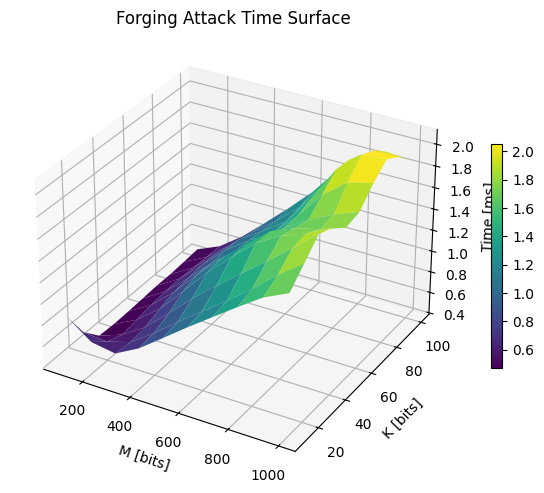

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 


def time_substitution(M_size, K_size, samples=50):
    def single():
        u = np.random.randint(0, 2, size=M_size)
        k = np.random.randint(0, 2, size=K_size)
        t = computeTag(u, k)
        start = time.perf_counter()
        u1, t1 = sub_attack(u, t)
        _ = verification(u1, k, t1)
        return (time.perf_counter() - start) * 1000
    return np.mean([single() for _ in range(samples)])

def time_forging(M_size, K_size, samples=50):
    def single():
        u = np.random.randint(0, 2, size=M_size)
        k = np.random.randint(0, 2, size=K_size)
        start = time.perf_counter()
        u1, t1 = sub_attack(u, computeTag(u, k))
        _ = verification(u1, k, t1)
        return (time.perf_counter() - start) * 1000
    return np.mean([single() for _ in range(samples)])


M_values = np.arange(100, 1001, 100)  # 100, 200, ..., 1000
K_values = np.arange(10, 101, 10)     # 10, 20, ..., 100

sub_times = np.zeros((len(K_values), len(M_values)))
forge_times = np.zeros_like(sub_times)

for i, K in enumerate(K_values):
    for j, M in enumerate(M_values):
        sub_times[i, j] = time_substitution(M, K)
        forge_times[i, j] = time_forging(M, K)

# Smoothing
sub_sm = gaussian_filter(sub_times, sigma=1)
forge_sm = gaussian_filter(forge_times, sigma=1)

# --- Plot heatmaps and 3D surfaces ---

# Heatmap plotting function
def plot_heat(data, title, cmap=cm.viridis):
    plt.figure(figsize=(7,5))
    sns.heatmap(data,
                xticklabels=M_values,
                yticklabels=K_values,
                cmap=cmap,
                cbar_kws={'label': 'Time (ms)'})
    plt.xlabel('Message length M [bits]')
    plt.ylabel('Key length K [bits]')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Surface plotting function
def plot_surface(data, title):
    M_grid, K_grid = np.meshgrid(M_values, K_values)
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(M_grid, K_grid, data, cmap=cm.viridis, edgecolor='none')
    ax.set_xlabel('M [bits]')
    ax.set_ylabel('K [bits]')
    ax.set_zlabel('Time [ms]')
    ax.set_title(title)
    fig.colorbar(surf, ax=ax, shrink=0.5)
    plt.tight_layout()
    plt.show()

# Generate and save all four plots
plot_heat(sub_sm,   'Substitution Attack Time Heatmap')
plot_surface(sub_sm, 'Substitution Attack Time Surface')
plot_heat(forge_sm, 'Forging Attack Time Heatmap')
plot_surface(forge_sm, 'Forging Attack Time Surface')




## ☑️ Success probability vs. K and M for the forging attack

The tag computation depends on the forged message *(known)* and the $s_k$ value. An attacker that tries to impersonate the legitimate sender needs to guess only the $s_k$ value in order to forge a non-authentic tag since the $s_u$ value can be easily obtained. This implies that the success probability of the forging attack only depends on the $s_k$ guess that the attacker makes.

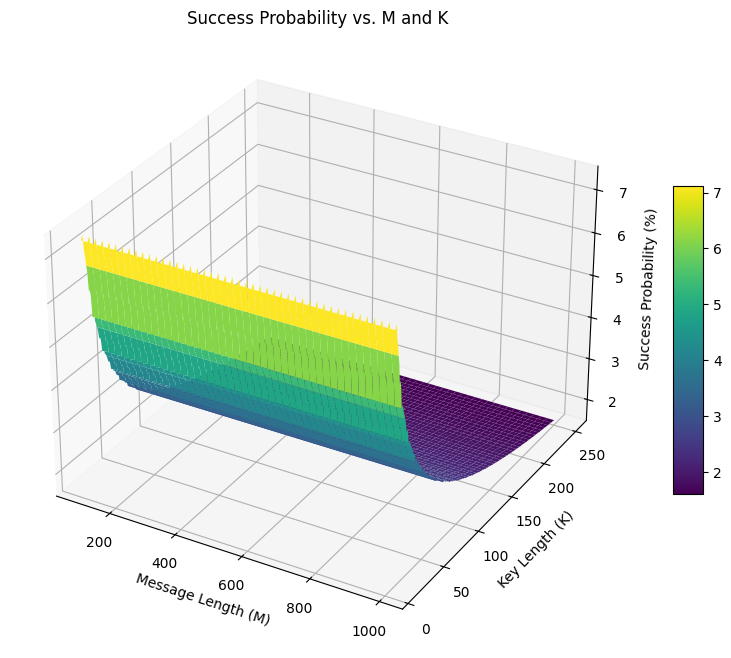

In [ ]:
# Load your existing success probability data (K vs. probability)
with open('peak_digit_sums_K10_to_K250.json', 'r') as f:
    data = json.load(f)

# Extract K and success probabilities (assuming data is for varying K)
K_values = np.array([entry["K"] for entry in data])
success_prob_K = np.array([entry["count"] / 1_000_000 for entry in data])  # Convert to %

# Create a 2D grid where success_prob_MK[i,j] = success_prob_K[i] for all M
M_values = np.arange(100, 1001, 10)  # Example M range
success_prob_MK = np.zeros((len(K_values), len(M_values)))
for i in range(len(K_values)):
    success_prob_MK[i, :] = success_prob_K[i]  # Same prob for all M
    
from mpl_toolkits.mplot3d import Axes3D

# Create grid
M_grid, K_grid = np.meshgrid(M_values, K_values)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(M_grid, K_grid, success_prob_MK, cmap=cm.viridis, edgecolor='none')

ax.set_xlabel('Message Length (M)')
ax.set_ylabel('Key Length (K)')
ax.set_zlabel('Success Probability (%)')
ax.set_title('Success Probability vs. M and K')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

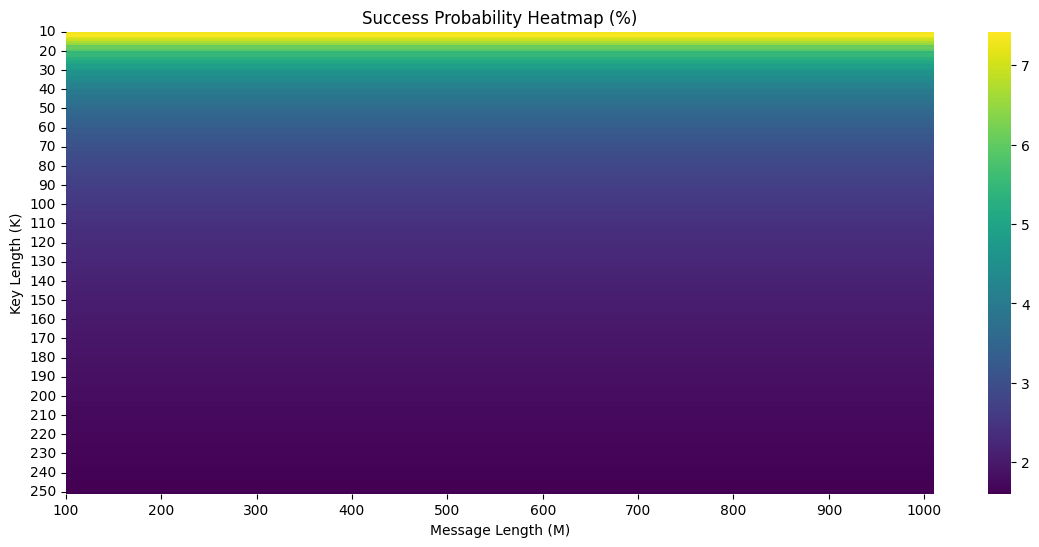

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.heatmap(success_prob_MK, cmap=cm.viridis, annot=False)

# Set axis labels
x_ticks = np.arange(0, len(M_values), 10)
y_ticks = np.arange(0, len(K_values), 10)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([M_values[i] for i in x_ticks])
ax.set_yticklabels([K_values[i] for i in y_ticks])

plt.xlabel("Message Length (M)")
plt.ylabel("Key Length (K)")
plt.title("Success Probability Heatmap (%)")
plt.show()